****
# Introduction #
****
This Notebook's goal is to successfully classify Chinese Digits (15 of them to be precise)

If you liked this Notebook or if you found it helpful, Kindly Upvote and fork it :)


* **Accelerator: GPU P1000**
* **Language: Python**
* **Model Used: Convolutional Neural Network (CNN)**
* **Testing Accuracy Achieved: 98.4%**



****
# Dataset Description #
****
**Can also be found in the Data Card of this Dataset**

One hundred Chinese nationals took part in data collection. Each participant wrote with a standard black ink pen all 15 numbers in a table with 15 designated regions drawn on a white A4 paper. 

This process was repeated 10 times with each participant. Each sheet was scanned with a resolution of 300x300 pixels.

It resulted in a dataset of 15000 images, each representing one character from a set of 15 characters (grouped in samples, grouped in suites, with 10 samples/volunteer and 100 volunteers).

****
# Reading and Displaying the Data #
****

In [1]:
# importing
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'/kaggle/input/chinese-mnist-digit-recognizer/chineseMNIST.csv') #Reading the data
df #Displaying the data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,label,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,九
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,八


In [3]:
df.shape #checking the shape of the data

(15000, 4098)

****
# Preprocessing #
****

In [4]:
# importing 
from sklearn.model_selection import train_test_split

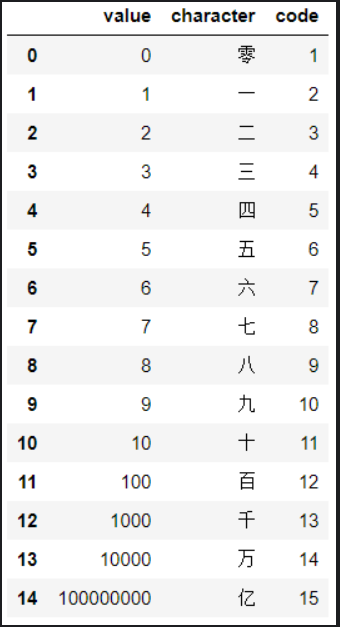

This are the values and its corresponding code

In [5]:
# Changing the values to the code for only some of the values
df['label'].replace(100,11,inplace=True)
df['label'].replace(1000,12,inplace=True)
df['label'].replace(10000,13,inplace=True)
df['label'].replace(100000000,14,inplace=True)

In [6]:
# The first 4096 columns contain the pixel values
# The 4097 column contains the code and the 4098th column cotains the corresponding character
x=df.iloc[:,:4096]  # x is our features or pixels (First 4096 columns)
y=df.iloc[:,4096:]  # y is our target variable or our code for the digits along with its character
print(x.shape,y.shape)

(15000, 4096) (15000, 2)


In [7]:
# First set us split the dataset into training and testing set in the ratio 70:30
# Second let us furthur split our testing set into testing and validation sets in the ratio 50:50

t_x,tes_x,t_y,tes_y=train_test_split(x,y,test_size=0.3,random_state=20) # Training and testing Split
val_x,te_x,val_y,te_y = train_test_split(tes_x, tes_y, test_size=0.5, random_state=20) # Testing and Validation Split
print(t_x.shape,t_y.shape,te_x.shape,te_y.shape,val_x.shape,val_y.shape)

(10500, 4096) (10500, 2) (2250, 4096) (2250, 2) (2250, 4096) (2250, 2)


In [8]:
# Our target variable contains two columns (label and Character)
# Our character column will come in handy during evaluation but for our model not that useful therefore let us go ahead and drop the character column :)
t_y=t_y.iloc[:,:1]
te_y=te_y.iloc[:,:1]
val_y=val_y.iloc[:,:1]
print(t_y.shape,te_y.shape,val_y.shape)

(10500, 1) (2250, 1) (2250, 1)


In [9]:
# Normalizing the pixel values
t_x=t_x.astype('float64')/255.0
te_x=te_x.astype('float64')/255.0
val_x=val_x.astype('float64')/255.0

In [10]:
# We have our pixels for each image as an array we need to reshape them into 2-D array and it has to be grayscale
# We need to first convert it to 1D, for that we use to_numpy() function
# Next We are basically converting these pixels into a 2-D 64 X 64 grayscale images
# We use the reshape function to do that
t_x=t_x.to_numpy().reshape(-1,64,64,1)
te_x=te_x.to_numpy().reshape(-1,64,64,1)
val_x=val_x.to_numpy().reshape(-1,64,64,1)
print(t_x.shape,te_x.shape,val_x.shape)

(10500, 64, 64, 1) (2250, 64, 64, 1) (2250, 64, 64, 1)


In [11]:
# We have our features (Pixels) shape in our desired format
# We need to one hot encode our Label column (Target variable)
# To apply one hot encoding we need our label shape to be (n,) but currently our Label column shape is (n,1) so we convert it by using squeeze() funciton
t_y=pd.get_dummies(t_y.squeeze())
te_y=pd.get_dummies(te_y.squeeze())
val_y=pd.get_dummies(val_y.squeeze())
print(t_y.shape,te_y.shape,val_y.shape)

(10500, 15) (2250, 15) (2250, 15)


****
# Displaying the Grayscale Images #
****

In [12]:
import matplotlib.pyplot as plt

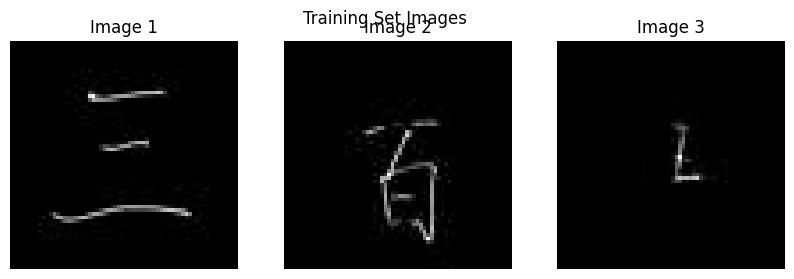

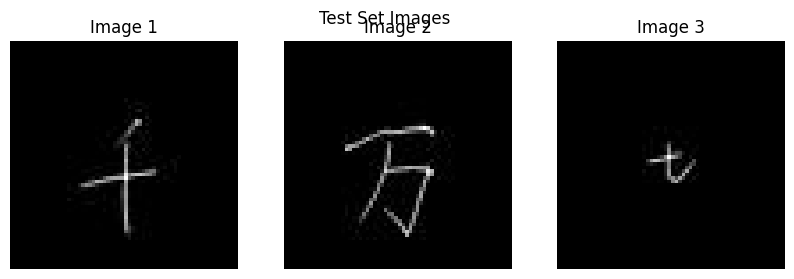

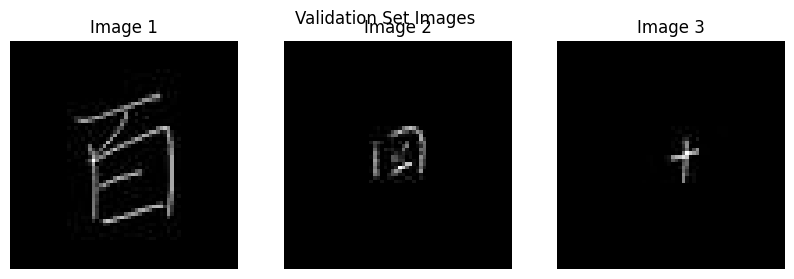

In [13]:
# Function to display images from a dataset
def display_images(dataset, title="Images"):
    plt.figure(figsize=(10, 3))  # Set the figure size
    for i in range(3):  # Display 3 images
        plt.subplot(1, 3, i+1)
        plt.imshow(dataset[i].reshape(64, 64), cmap='gray')  # Reshape to (64, 64) and plot in grayscale
        plt.axis('off')  # Hide axes
        plt.title(f"Image {i+1}")
    plt.suptitle(title)  # Add a title above the images
    plt.show()
# Display 3 images from each set
display_images(t_x, "Training Set Images")
display_images(te_x, "Test Set Images")
display_images(val_x, "Validation Set Images")


In [14]:
print(df['label'].nunique())
print(df['character'].nunique())

15
15


****
# CNN #
****

In [15]:
import keras as k
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Dropout,Flatten,Activation,Dense
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

In [16]:
mod=Sequential()

mod.add(Conv2D(64,(3,3),input_shape=(64,64,1),padding='same'))
mod.add(Activation('relu'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D())

mod.add(Conv2D(32,(3,3),padding='same'))
mod.add(Activation('relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.2))

mod.add(Conv2D(32,(3,3),padding='same'))
mod.add(Activation('relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.2))

mod.add(Flatten())

mod.add(Dense(1024,activation='relu'))
mod.add(BatchNormalization())

mod.add(Dense(512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))

mod.add(Dense(128,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))

mod.add(Dense(15,activation='softmax'))
mod.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      33,555,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 34,183,375 (130.40 MB)

 Trainable params: 34,179,791 (130.39 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [17]:
lr=ReduceLROnPlateau(monitor='val_accuracy',patience=15,factor=0.005,mode='max')
es=EarlyStopping(monitor='val_accuracy',patience=15,restore_best_weights=True,mode='max')

In [18]:
opt=k.optimizers.Adam(learning_rate=0.05)
mod.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['Accuracy'])

In [19]:
modh=mod.fit(t_x,t_y,callbacks=[lr,es],epochs=100,validation_data=[val_x,val_y],batch_size=32)

Epoch 1/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - Accuracy: 0.3446 - loss: 2.3385 - val_Accuracy: 0.1284 - val_loss: 10.9519 - learning_rate: 0.0500
Epoch 2/100
 10/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Accuracy: 0.6449 - loss: 1.2240

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuracy` which is not available. Available metrics are: Accuracy,loss,val_Accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: Accuracy,loss,val_Accuracy,val_loss,learning_rate
  current = self.get_monitor_value(logs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - Accuracy: 0.6764 - loss: 1.0248 - val_Accuracy: 0.1898 - val_loss: 48.0245 - learning_rate: 0.0500
Epoch 3/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Accuracy: 0.7869 - loss: 0.7278 - val_Accuracy: 0.3178 - val_loss: 27.9559 - learning_rate: 0.0500
Epoch 4/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Accuracy: 0.7909 - loss: 0.7718 - val_Accuracy: 0.0711 - val_loss: 44071.5312 - learning_rate: 0.0500
Epoch 5/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Accuracy: 0.7895 - loss: 0.7978 - val_Accuracy: 0.1578 - val_loss: 3070.7107 - learning_rate: 0.0500
Epoch 6/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - Accuracy: 0.8559 - loss: 0.5133 - val_Accuracy: 0.5173 - val_loss: 17.3952 - learning_rate: 0.0500
Epoch 7/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Accuracy: 0.8092 - loss: 0.7007 - val_Accuracy: 0.3307 - val_loss: 9.5184 - learning_rate: 0.0500
Epoch 8/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - Accuracy: 0.8221 - los

****
# Prediction on the Testing Dataset #
****

In [20]:
pred=mod.predict(te_x)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [21]:
pred=np.argmax(pred,axis=1)
te_y=np.argmax(te_y,axis=1)

****
# Evaluation Metrics #
****

In [22]:
# importing
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## ROC Curve ##

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


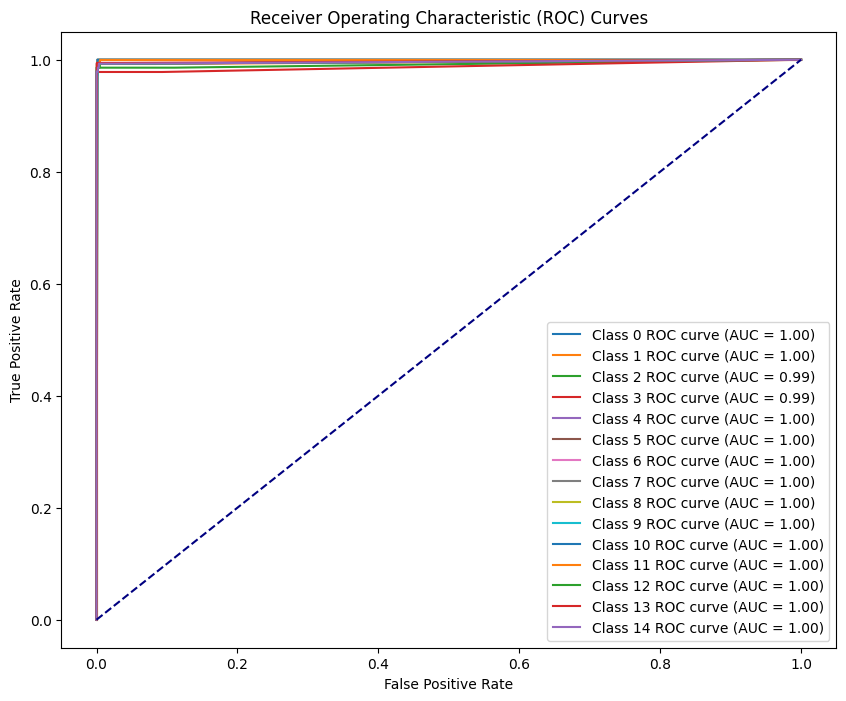

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Get model predictions
y_pred = mod.predict(val_x)
y_true = val_y  # This is one-hot encoded ground truth

# Binarize the labels for multi-class ROC AUC calculation
y_true_bin = label_binarize(y_true, classes=[i for i in range(15)])  # Assuming 15 classes
n_classes = y_true_bin.shape[1]
# Calculate ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred[:, i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


## Classification Report ##

In [24]:
print('Classification Report:\n\n',classification_report(te_y,pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       0.98      0.98      0.98       160
           2       0.96      0.98      0.97       139
           3       1.00      0.97      0.99       144
           4       0.99      0.99      0.99       161
           5       0.97      0.99      0.98       148
           6       0.97      1.00      0.99       150
           7       0.99      0.99      0.99       138
           8       0.99      0.99      0.99       137
           9       0.98      0.98      0.98       158
          10       0.95      1.00      0.98       148
          11       1.00      0.98      0.99       163
          12       1.00      0.96      0.98       159
          13       0.99      1.00      1.00       143
          14       1.00      0.99      0.99       165

    accuracy                           0.98      2250
   macro avg       0.98      0.99      0.98      2250
w

## Confusion Matrix ##

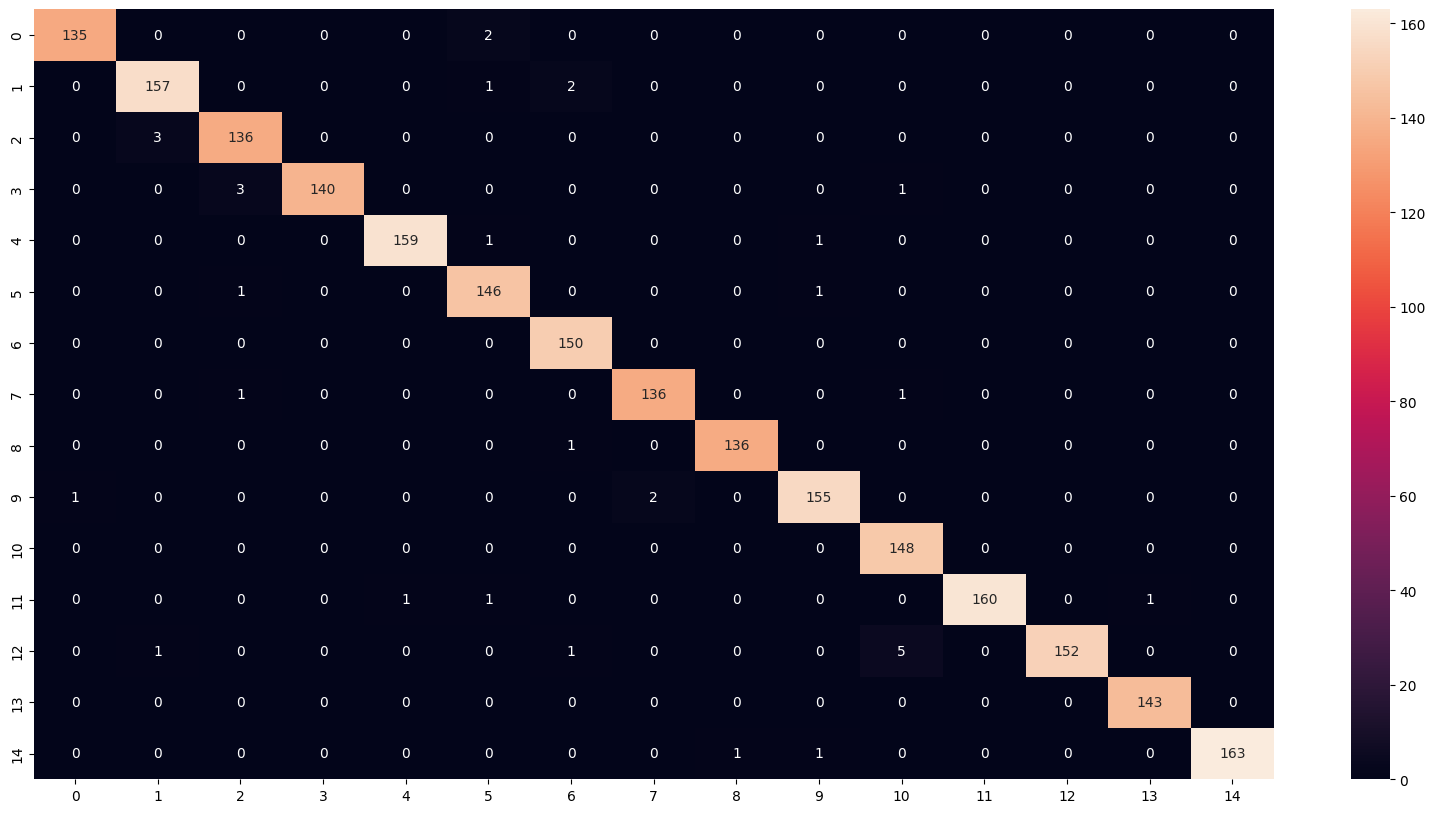

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(te_y,pred),annot=True,fmt='d')
plt.show()

## Accuracy,Precision,Recall and F1 Score ##

In [26]:
print('Accuracy: ',accuracy_score(te_y,pred),'\n')
print('Precision: ',precision_score(te_y,pred,average='micro'),'\n')
print('Recall: ',recall_score(te_y,pred,average='micro'),'\n')
print('F1 Score: ',f1_score(te_y,pred,average='micro'),'\n')

Accuracy:  0.9848888888888889 

Precision:  0.9848888888888889 

Recall:  0.9848888888888889 

F1 Score:  0.9848888888888889 



****
# Feedback and Suggestions #
****

**Kindly Provide feedback and suggestions to improve this notebook**

**Kindly Upvote if you found this notebook helpful or if you liked it :)**